#### CV of Hash Features

In [1]:
import sys
sys.path.insert(0, '../../bosch_helper')
from bosch_helper import *

%matplotlib inline

/c3se/NOBACKUP/users/lyaa/conda_dir/miniconda/envs/kaggle/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


##### Load data up to benchmark 7

In [2]:
filename = pd.HDFStore('../hpopt_1/numeric_b1_b7_nf149.hdf')
print(filename.keys())
filename.close()

['/numeric', '/y_train']


In [3]:
x = pd.read_hdf('../hpopt_1/numeric_b1_b7_nf149.hdf', 'numeric')
y_train = pd.read_hdf('../hpopt_1/numeric_b1_b7_nf149.hdf', 'y_train')

##### Load hash feature

In [8]:
nhash = pd.read_hdf('hash_numeric.hdf', 'hash_numeric')

In [10]:
x = x.join(nhash)

In [12]:
x_train = x.loc['train']
x_test = x.loc['test']

In [17]:
del x, nhash
gc.collect()

28

### CV score based on stratified KFold with repeated models

In [18]:
# CV
# specify parameters 
# 'booster':'gbtree'
params = {'max_depth':14, 'eta':0.03, 'silent':1, 'objective':'binary:logistic', 'nthread':20,
         'lambda':4, 'subsample':0.9, 'min_child_weight':5, 'booster':'gbtree', 'alpha':0,
         'base_score':0.0058, 'colsample_bytree':0.6}

# 'booster':'dart'
# params = {'max_depth':14, 'eta':0.03, 'silent':1, 'objective':'binary:logistic', 'nthread':20,
#         'lambda':4, 'subsample':0.9, 'min_child_weight':5, 'booster':'dart', 'alpha':0,
#         'base_score':0.0058, 'nthread':20, 'colsample_bytree':0.6, 
#         'sample_type':'uniform', 'normalize_type':'tree', 'rate_drop':0.1, 'skip_drop':0.2, 'one_drop':True}

cv_results, clfs, running_time = cross_val_predict_skf_rm_xgb(params, x_train, y_train, 
                                                              num_boost_round=80, n_splits=5, 
                                                              n_repeats=3, random_state=5870577, 
                                                              verbose_eval=True)

results = {'clfs': clfs, 'cv_results': cv_results, 'running_time': running_time}
save_pickle(results, 'results_benchmark_8_cv_5_hash.pickle')

[0]	train-error:0.005811	test-error:0.005812	train-MCC:0.309215	test-MCC:0.301967
[1]	train-error:0.005811	test-error:0.005812	train-MCC:0.335733	test-MCC:0.326261
[2]	train-error:0.005811	test-error:0.005812	train-MCC:0.348581	test-MCC:0.33397
[3]	train-error:0.005811	test-error:0.005812	train-MCC:0.361706	test-MCC:0.351471
[4]	train-error:0.005811	test-error:0.005812	train-MCC:0.386493	test-MCC:0.365614
[5]	train-error:0.005811	test-error:0.005812	train-MCC:0.393544	test-MCC:0.37018
[6]	train-error:0.005811	test-error:0.005812	train-MCC:0.409499	test-MCC:0.382208
[7]	train-error:0.005811	test-error:0.005812	train-MCC:0.41754	test-MCC:0.390952
[8]	train-error:0.005811	test-error:0.005812	train-MCC:0.427532	test-MCC:0.399954
[9]	train-error:0.005811	test-error:0.005812	train-MCC:0.431908	test-MCC:0.399703
[10]	train-error:0.005811	test-error:0.005812	train-MCC:0.437134	test-MCC:0.405093
[11]	train-error:0.005811	test-error:0.005812	train-MCC:0.445974	test-MCC:0.406293
[12]	train-error:

[19]	train-error:0.005743	test-error:0.005744	train-MCC:0.472652	test-MCC:0.416809
[20]	train-error:0.005687	test-error:0.005652	train-MCC:0.473779	test-MCC:0.41783
[21]	train-error:0.00562	test-error:0.005592	train-MCC:0.478876	test-MCC:0.41918
[22]	train-error:0.005599	test-error:0.005542	train-MCC:0.483877	test-MCC:0.420947
[23]	train-error:0.005521	test-error:0.005445	train-MCC:0.484584	test-MCC:0.421386
[24]	train-error:0.005426	test-error:0.005381	train-MCC:0.487854	test-MCC:0.422979
[25]	train-error:0.005334	test-error:0.005271	train-MCC:0.490828	test-MCC:0.425272
[26]	train-error:0.005278	test-error:0.005216	train-MCC:0.49363	test-MCC:0.42579
[27]	train-error:0.005233	test-error:0.005178	train-MCC:0.495648	test-MCC:0.426295
[28]	train-error:0.005206	test-error:0.005157	train-MCC:0.498986	test-MCC:0.430088
[29]	train-error:0.005193	test-error:0.005136	train-MCC:0.500567	test-MCC:0.429714
[30]	train-error:0.005172	test-error:0.005136	train-MCC:0.501945	test-MCC:0.430164
[31]	trai

[38]	train-error:0.005003	test-error:0.005073	train-MCC:0.50771	test-MCC:0.446498
[39]	train-error:0.004981	test-error:0.005064	train-MCC:0.508721	test-MCC:0.446961
[40]	train-error:0.004966	test-error:0.005048	train-MCC:0.511676	test-MCC:0.449032
[41]	train-error:0.004943	test-error:0.005043	train-MCC:0.512665	test-MCC:0.448399
[42]	train-error:0.004912	test-error:0.005031	train-MCC:0.514552	test-MCC:0.450429
[43]	train-error:0.004891	test-error:0.005026	train-MCC:0.515408	test-MCC:0.450236
[44]	train-error:0.004878	test-error:0.005022	train-MCC:0.51714	test-MCC:0.451215
[45]	train-error:0.004866	test-error:0.00501	train-MCC:0.519121	test-MCC:0.449642
[46]	train-error:0.004842	test-error:0.004984	train-MCC:0.521155	test-MCC:0.44964
[47]	train-error:0.00483	test-error:0.004959	train-MCC:0.522032	test-MCC:0.448719
[48]	train-error:0.004819	test-error:0.00495	train-MCC:0.522997	test-MCC:0.448905
[49]	train-error:0.004801	test-error:0.00495	train-MCC:0.52384	test-MCC:0.44885
[50]	train-er

[57]	train-error:0.004704	test-error:0.004895	train-MCC:0.53015	test-MCC:0.449642
[58]	train-error:0.004699	test-error:0.004891	train-MCC:0.531286	test-MCC:0.450428
[59]	train-error:0.00469	test-error:0.00487	train-MCC:0.532084	test-MCC:0.449675
[60]	train-error:0.004686	test-error:0.004862	train-MCC:0.533307	test-MCC:0.449869
[61]	train-error:0.004674	test-error:0.004862	train-MCC:0.534093	test-MCC:0.450428
[62]	train-error:0.004656	test-error:0.004857	train-MCC:0.535033	test-MCC:0.451644
[63]	train-error:0.004649	test-error:0.004845	train-MCC:0.535073	test-MCC:0.450621
[64]	train-error:0.00464	test-error:0.004836	train-MCC:0.535612	test-MCC:0.450283
[65]	train-error:0.004628	test-error:0.004811	train-MCC:0.537843	test-MCC:0.452085
[66]	train-error:0.004619	test-error:0.004807	train-MCC:0.538016	test-MCC:0.450677
[67]	train-error:0.004608	test-error:0.004798	train-MCC:0.539077	test-MCC:0.451682
[68]	train-error:0.004599	test-error:0.004786	train-MCC:0.540219	test-MCC:0.45186
[69]	trai

[76]	train-error:0.004525	test-error:0.004689	train-MCC:0.546611	test-MCC:0.462724
[77]	train-error:0.004522	test-error:0.004667	train-MCC:0.547924	test-MCC:0.463856
[78]	train-error:0.004515	test-error:0.004672	train-MCC:0.549247	test-MCC:0.461007
[79]	train-error:0.00451	test-error:0.004655	train-MCC:0.549758	test-MCC:0.462679
Repeat 0, split 4, test MCC = 0.463, running time = 6.566 min
[0]	train-error:0.005811	test-error:0.005812	train-MCC:0.257943	test-MCC:0.242612
[1]	train-error:0.005811	test-error:0.005812	train-MCC:0.329596	test-MCC:0.312771
[2]	train-error:0.005811	test-error:0.005812	train-MCC:0.357052	test-MCC:0.346443
[3]	train-error:0.005811	test-error:0.005812	train-MCC:0.372482	test-MCC:0.360479
[4]	train-error:0.005811	test-error:0.005812	train-MCC:0.375836	test-MCC:0.36527
[5]	train-error:0.005811	test-error:0.005812	train-MCC:0.387231	test-MCC:0.37039
[6]	train-error:0.005811	test-error:0.005812	train-MCC:0.401312	test-MCC:0.374431
[7]	train-error:0.005811	test-error

[14]	train-error:0.00581	test-error:0.005808	train-MCC:0.453519	test-MCC:0.408602
[15]	train-error:0.00581	test-error:0.005808	train-MCC:0.456712	test-MCC:0.411744
[16]	train-error:0.005808	test-error:0.005808	train-MCC:0.461608	test-MCC:0.415764
[17]	train-error:0.005807	test-error:0.005808	train-MCC:0.462637	test-MCC:0.418164
[18]	train-error:0.005806	test-error:0.005808	train-MCC:0.470239	test-MCC:0.422597
[19]	train-error:0.005804	test-error:0.005808	train-MCC:0.472454	test-MCC:0.428477
[20]	train-error:0.005781	test-error:0.005791	train-MCC:0.476226	test-MCC:0.430435
[21]	train-error:0.00573	test-error:0.005757	train-MCC:0.479585	test-MCC:0.430094
[22]	train-error:0.005674	test-error:0.005711	train-MCC:0.483516	test-MCC:0.431996
[23]	train-error:0.005586	test-error:0.005614	train-MCC:0.486866	test-MCC:0.435059
[24]	train-error:0.005491	test-error:0.005512	train-MCC:0.489352	test-MCC:0.438594
[25]	train-error:0.005385	test-error:0.005381	train-MCC:0.492189	test-MCC:0.440505
[26]	tr

[33]	train-error:0.005077	test-error:0.005145	train-MCC:0.504379	test-MCC:0.452294
[34]	train-error:0.005051	test-error:0.005136	train-MCC:0.506448	test-MCC:0.453875
[35]	train-error:0.005018	test-error:0.005107	train-MCC:0.509344	test-MCC:0.453507
[36]	train-error:0.005	test-error:0.005086	train-MCC:0.512264	test-MCC:0.452874
[37]	train-error:0.004984	test-error:0.00506	train-MCC:0.514658	test-MCC:0.455553
[38]	train-error:0.004964	test-error:0.005056	train-MCC:0.517084	test-MCC:0.454217
[39]	train-error:0.004946	test-error:0.005039	train-MCC:0.518389	test-MCC:0.455096
[40]	train-error:0.004927	test-error:0.005026	train-MCC:0.521421	test-MCC:0.455276
[41]	train-error:0.004909	test-error:0.00501	train-MCC:0.523403	test-MCC:0.456214
[42]	train-error:0.004882	test-error:0.005005	train-MCC:0.523562	test-MCC:0.457917
[43]	train-error:0.004863	test-error:0.00498	train-MCC:0.526251	test-MCC:0.456708
[44]	train-error:0.004842	test-error:0.004963	train-MCC:0.526303	test-MCC:0.456433
[45]	train

[52]	train-error:0.004731	test-error:0.004921	train-MCC:0.537159	test-MCC:0.452811
[53]	train-error:0.004709	test-error:0.004917	train-MCC:0.5392	test-MCC:0.452198
[54]	train-error:0.004691	test-error:0.004891	train-MCC:0.541274	test-MCC:0.452752
[55]	train-error:0.004684	test-error:0.004879	train-MCC:0.543937	test-MCC:0.452294
[56]	train-error:0.004677	test-error:0.004853	train-MCC:0.547233	test-MCC:0.452595
[57]	train-error:0.004663	test-error:0.004845	train-MCC:0.547583	test-MCC:0.452909
[58]	train-error:0.004663	test-error:0.004841	train-MCC:0.550531	test-MCC:0.453612
[59]	train-error:0.004647	test-error:0.004832	train-MCC:0.552043	test-MCC:0.455264
[60]	train-error:0.004639	test-error:0.004832	train-MCC:0.553425	test-MCC:0.455096
[61]	train-error:0.004627	test-error:0.004819	train-MCC:0.556243	test-MCC:0.456661
[62]	train-error:0.004624	test-error:0.004811	train-MCC:0.557048	test-MCC:0.455607
[63]	train-error:0.004616	test-error:0.004811	train-MCC:0.558918	test-MCC:0.456828
[64]	t

[71]	train-error:0.00456	test-error:0.004697	train-MCC:0.552604	test-MCC:0.457637
[72]	train-error:0.00455	test-error:0.004705	train-MCC:0.552698	test-MCC:0.458689
[73]	train-error:0.00454	test-error:0.004705	train-MCC:0.55448	test-MCC:0.458689
[74]	train-error:0.004535	test-error:0.004701	train-MCC:0.557012	test-MCC:0.458586
[75]	train-error:0.004529	test-error:0.004697	train-MCC:0.557839	test-MCC:0.458972
[76]	train-error:0.004527	test-error:0.004697	train-MCC:0.559951	test-MCC:0.458066
[77]	train-error:0.004517	test-error:0.004697	train-MCC:0.561481	test-MCC:0.458534
[78]	train-error:0.004516	test-error:0.004697	train-MCC:0.563676	test-MCC:0.459314
[79]	train-error:0.004505	test-error:0.004705	train-MCC:0.565758	test-MCC:0.458689
Repeat 1, split 4, test MCC = 0.459, running time = 6.542 min
[0]	train-error:0.005811	test-error:0.005812	train-MCC:0.273692	test-MCC:0.252031
[1]	train-error:0.005811	test-error:0.005812	train-MCC:0.320486	test-MCC:0.305895
[2]	train-error:0.005811	test-e

[9]	train-error:0.005811	test-error:0.005812	train-MCC:0.446061	test-MCC:0.420844
[10]	train-error:0.005811	test-error:0.005812	train-MCC:0.450173	test-MCC:0.421392
[11]	train-error:0.005811	test-error:0.005812	train-MCC:0.454875	test-MCC:0.422635
[12]	train-error:0.005811	test-error:0.005812	train-MCC:0.455325	test-MCC:0.422029
[13]	train-error:0.005811	test-error:0.005812	train-MCC:0.459441	test-MCC:0.424435
[14]	train-error:0.005811	test-error:0.005812	train-MCC:0.460138	test-MCC:0.425443
[15]	train-error:0.005811	test-error:0.005812	train-MCC:0.46451	test-MCC:0.427275
[16]	train-error:0.005811	test-error:0.005812	train-MCC:0.467971	test-MCC:0.432103
[17]	train-error:0.005811	test-error:0.005808	train-MCC:0.471295	test-MCC:0.433044
[18]	train-error:0.005762	test-error:0.005774	train-MCC:0.475102	test-MCC:0.433447
[19]	train-error:0.005713	test-error:0.005736	train-MCC:0.478267	test-MCC:0.435247
[20]	train-error:0.00569	test-error:0.005719	train-MCC:0.480685	test-MCC:0.436367
[21]	tr

[28]	train-error:0.005332	test-error:0.005419	train-MCC:0.494067	test-MCC:0.44986
[29]	train-error:0.005249	test-error:0.005381	train-MCC:0.496556	test-MCC:0.449321
[30]	train-error:0.00519	test-error:0.005301	train-MCC:0.499221	test-MCC:0.45064
[31]	train-error:0.005139	test-error:0.005259	train-MCC:0.500732	test-MCC:0.450314
[32]	train-error:0.005102	test-error:0.005212	train-MCC:0.50414	test-MCC:0.449078
[33]	train-error:0.005057	test-error:0.005204	train-MCC:0.505445	test-MCC:0.450465
[34]	train-error:0.005027	test-error:0.005166	train-MCC:0.50694	test-MCC:0.450835
[35]	train-error:0.005007	test-error:0.005153	train-MCC:0.508389	test-MCC:0.45005
[36]	train-error:0.004987	test-error:0.005111	train-MCC:0.510071	test-MCC:0.451347
[37]	train-error:0.004968	test-error:0.005098	train-MCC:0.511488	test-MCC:0.451175
[38]	train-error:0.004943	test-error:0.00509	train-MCC:0.513878	test-MCC:0.450884
[39]	train-error:0.004927	test-error:0.005069	train-MCC:0.514689	test-MCC:0.452104
[40]	train-

[47]	train-error:0.004772	test-error:0.0049	train-MCC:0.523663	test-MCC:0.453175
[48]	train-error:0.004767	test-error:0.004891	train-MCC:0.525295	test-MCC:0.453274
[49]	train-error:0.004753	test-error:0.004891	train-MCC:0.526325	test-MCC:0.453619
[50]	train-error:0.004738	test-error:0.004887	train-MCC:0.526565	test-MCC:0.454518
[51]	train-error:0.004729	test-error:0.00487	train-MCC:0.52773	test-MCC:0.45572
[52]	train-error:0.00472	test-error:0.004862	train-MCC:0.528742	test-MCC:0.454962
[53]	train-error:0.004697	test-error:0.004841	train-MCC:0.530766	test-MCC:0.455456
[54]	train-error:0.004686	test-error:0.004828	train-MCC:0.531431	test-MCC:0.455952
[55]	train-error:0.004677	test-error:0.004832	train-MCC:0.532753	test-MCC:0.455276
[56]	train-error:0.004666	test-error:0.004828	train-MCC:0.534186	test-MCC:0.455456
[57]	train-error:0.004654	test-error:0.004828	train-MCC:0.534807	test-MCC:0.454656
[58]	train-error:0.004643	test-error:0.004828	train-MCC:0.537132	test-MCC:0.454931
[59]	train

[66]	train-error:0.004591	test-error:0.004752	train-MCC:0.551588	test-MCC:0.463523
[67]	train-error:0.00458	test-error:0.004748	train-MCC:0.551822	test-MCC:0.463523
[68]	train-error:0.004574	test-error:0.004739	train-MCC:0.553618	test-MCC:0.462965
[69]	train-error:0.004567	test-error:0.004727	train-MCC:0.555152	test-MCC:0.463409
[70]	train-error:0.004563	test-error:0.004718	train-MCC:0.555892	test-MCC:0.464786
[71]	train-error:0.004562	test-error:0.004714	train-MCC:0.557452	test-MCC:0.462894
[72]	train-error:0.004558	test-error:0.004714	train-MCC:0.559409	test-MCC:0.465394
[73]	train-error:0.004555	test-error:0.004718	train-MCC:0.560974	test-MCC:0.463652
[74]	train-error:0.004545	test-error:0.004718	train-MCC:0.563998	test-MCC:0.464248
[75]	train-error:0.004542	test-error:0.004714	train-MCC:0.567013	test-MCC:0.464114
[76]	train-error:0.004537	test-error:0.004714	train-MCC:0.568346	test-MCC:0.46543
[77]	train-error:0.004527	test-error:0.004705	train-MCC:0.570542	test-MCC:0.466115
[78]	t

In [19]:
cv_train_mean = cv_results['train'].mean(axis=1)
cv_train_std = cv_results['train'].std(axis=1)
cv_test_mean = cv_results['test'].mean(axis=1)
cv_test_std = cv_results['test'].std(axis=1)

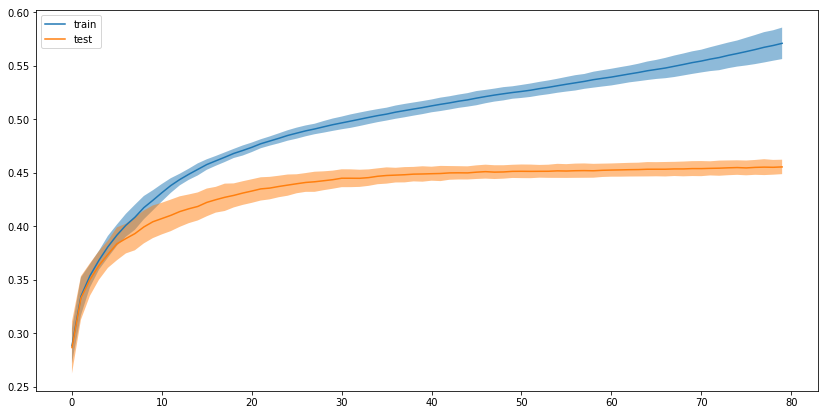

In [20]:
plt.figure(figsize=(14, 7))
plt.plot(np.arange(len(cv_train_mean)), cv_train_mean)
plt.fill_between(np.arange(len(cv_train_mean)), cv_train_mean-cv_train_std, cv_train_mean+cv_train_std, alpha=0.5)
plt.plot(np.arange(len(cv_train_mean)), cv_test_mean)
plt.fill_between(np.arange(len(cv_test_mean)), cv_test_mean-cv_test_std, cv_test_mean+cv_test_std, alpha=0.5)
plt.legend(['train', 'test'])

[0]	train-error:0.005811	train-MCC:0.314437
[1]	train-error:0.005811	train-MCC:0.332495
[2]	train-error:0.005811	train-MCC:0.369128
[3]	train-error:0.005811	train-MCC:0.379204
[4]	train-error:0.005811	train-MCC:0.384873
[5]	train-error:0.005811	train-MCC:0.38818
[6]	train-error:0.005811	train-MCC:0.393634
[7]	train-error:0.005811	train-MCC:0.40181
[8]	train-error:0.005811	train-MCC:0.41625
[9]	train-error:0.005811	train-MCC:0.425727
[10]	train-error:0.005811	train-MCC:0.430817
[11]	train-error:0.005811	train-MCC:0.44094
[12]	train-error:0.005811	train-MCC:0.443355
[13]	train-error:0.005811	train-MCC:0.448237
[14]	train-error:0.005811	train-MCC:0.45287
[15]	train-error:0.005811	train-MCC:0.459643
[16]	train-error:0.005811	train-MCC:0.462084
[17]	train-error:0.005811	train-MCC:0.466815
[18]	train-error:0.00581	train-MCC:0.472171
[19]	train-error:0.005804	train-MCC:0.475392
[20]	train-error:0.005764	train-MCC:0.478044
[21]	train-error:0.005704	train-MCC:0.481069
[22]	train-error:0.005615	

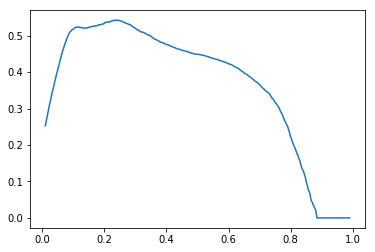

In [21]:
# Train the model
dtrain = xgb.DMatrix(x_train, label=y_train)
params['seed'] = 28537894
clf = xgb.train(params, dtrain, num_boost_round=60,
               feval=mcc_eval, evals=[(dtrain, 'train')])

y_train_pred = clf.predict(dtrain)

# Find best threshold 
thresholds = np.linspace(0.01, 0.99, 400)
mcc = np.array([matthews_corrcoef(y_train, y_train_pred>thr) for thr in thresholds])
plt.plot(thresholds, mcc)
best_threshold = thresholds[mcc.argmax()]

print('Optimal MCC = {:.3f}'.format(mcc.max()))
print('Optimal threshold = {:.3f}'.format(best_threshold))

### Predict on test data

In [22]:
dtest = xgb.DMatrix(x_test)
y_test_pred = clf.predict(dtest)
y_test_pred_int = (y_test_pred>best_threshold).astype(int)

sub = pd.read_csv("../../data/sample_submission.csv.zip", index_col=0)
sub["Response"] = y_test_pred_int
sub.to_csv("benchmark_8_submission_cv_5_hash.csv.gz", compression="gzip")

With hash features:
- LB: `n_estimators=60`: Private MCC = 0.46801, public MCC = 0.44690
- CV: `n_estimators=80`: Score mean = 0.455, std = 0.007
- CV: `n_estimators=60`: Score mean = 0.452316, std = 0.00618, MCC~[0.44635, 0.45872]

Time series features, excluding MeanTimeDiff:
- LB: `n_estimators=60`: Private MCC = 0.46212, public MCC = 0.44761
- CV: `n_estimators=80`: Score mean = 0.454509, std = 0.00586
- CV: `n_estimators=60`: Score mean = 0.4534794, std = 0.0067, MCC~[0.44682, 0.46014]

In [23]:
cv_test_mean[60]+cv_test_std[60]

cv_test_mean[60]-cv_test_std[60]

cv_test_mean[79]

cv_test_std[60]

0.006184952848879055

In [25]:
cv_test_mean[60]+cv_test_std[60]

0.4587207528488791

In [26]:
cv_test_mean[60]-cv_test_std[60]

0.446350847151121